### vishva patel 
#### Semester-III, M.Sc. (Statistics) Practical Examination
##### Data Analysis using Python

## Q-1) The dataset iris contains data on the variables: Sepal Length, Sepal Width, Petal Length, Petal Width, and Species. 

### i) Read this dataset from CSV file iris.csv into a Pandas DataFrame. 

In [1]:
import pandas as pd
iris = pd.read_csv("iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### ii) Compute a DataFrame that contains mean and standard deviation of all variables for each species.


### with the help of groupby method

In [2]:
byspecies=iris.groupby('species')
byspecies.agg(['mean','std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

### with  the help of pivot fun.

In [3]:
pivot=pd.pivot_table(data=iris,values=['sepal_length','sepal_width','petal_length','petal_width'],index="species",aggfunc=['mean','std'])
pivot

mean                                               std  \
           petal_length petal_width sepal_length sepal_width petal_length   
species                                                                     
setosa            1.462       0.246        5.006       3.428     0.173664   
versicolor        4.260       1.326        5.936       2.770     0.469911   
virginica         5.552       2.026        6.588       2.974     0.551895   

                                                 
           petal_width sepal_length sepal_width  
species                                          
setosa        0.105386     0.352490    0.379064  
versicolor    0.197753     0.516171    0.313798  
virginica     0.274650     0.635880    0.322497

### iii) Perform a suitable test to test whether the mean Sepal lengths are same for each of the three species. Compute p-value and state your conclusion.


#####  H1= mean of Sepal lengths are same for each of the three species  vs  H0= mean of Sepal lengths are  not same for each of the three species

In [5]:
setosa_sl = iris[iris.species == 'setosa'].sepal_length
versi_sl = iris[iris.species == 'versicolor'].sepal_length
virginica_sl = iris[iris.species == 'virginica'].sepal_length

In [6]:
from scipy import stats
test = stats.f_oneway(setosa_sl, versi_sl, virginica_sl)
test

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

### here p value < alpha (0.05) so we reject null hypothesis. hence mean of Sepal lengths are  same (no diffrence) for each of the three species.

#### iv) Use matplotlib to prepare a suitable presentation quality data visualization to present values of ‘Petal length’ for different Species.

Histogram of Petal Length: setosa


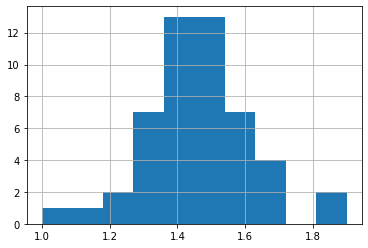

Histogram of Petal Length: versicolor


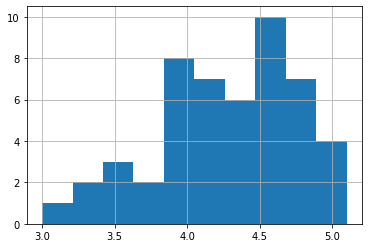

Histogram of Petal Length: virginica


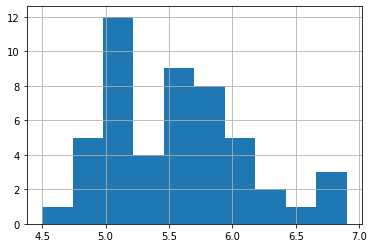

In [8]:
from matplotlib import pyplot as plt
for species, data in byspecies:
    print('Histogram of Petal Length:',species)
    data['petal_length'].hist()
    plt.show()  ##plotted graph below is the histogram of species and petal length

#### v)Use formula api of StatsModels to fit a linear regression model, without intercept, for Petal length on Sepal length and Sepal width.


In [9]:
iris.columns=['SL','SW','PL','PW','SP']

In [10]:
import statsmodels.formula.api as smf
model=smf.ols("PL~SL+SW-1", iris)
result= model.fit()
result2=result.summary()
result2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PL   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              2663.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                   9.22e-117
Time:                        11:22:43   Log-Likelihood:                         -155.50
No. Observations:                 150   AIC:                                      315.0
Df Residuals:                     148   BIC:                                      321.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SL             1.5603      0.046     34.238      0.000       1.470       1.650
SW            -1.7457      0.087    -20.045      0.000      -1.918      -1.574
==============================================================================
Omnibus:                        2.882   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.892
Skew:                           0.330   Prob(JB):                        0.236
Kurtosis:                       2.836   Cond. No.                         11.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### conclusion : As the values of r and rsquare(uncentered) as the model is fitted without intercept comes out to be 0.973 that is 97.3% of variation in PETAL LENGTH is explained by SEPAL LENGTH AND SEPAL WIDTH.